In [17]:
from neural_network import NeuralNetwork
from activation_function import Sigmoid, Softmax, Linear, ReLU
from loss_function import Quadratic, CrossEntropy

import numpy as np
import matplotlib.pyplot as plt

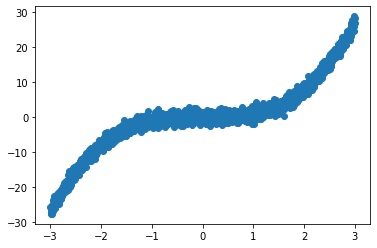

In [18]:
n=2000
X = np.linspace(-3, 3, num=n)
noise = np.random.normal(0, 1, n)
y = X**3 + noise

plt.scatter(X, y)
plt.show()

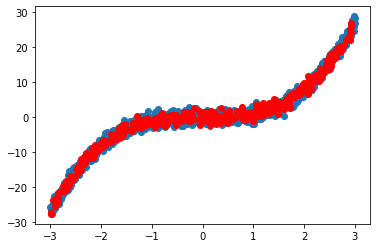

In [19]:
trainingSetSize = int(0.8*n)
trainIdxs = np.random.choice(n, trainingSetSize, replace=False)
valIdxs = np.array(list(set(np.arange(n)) - set(trainIdxs)))

train_X, train_y = X[trainIdxs][:,None], y[trainIdxs][:,None]
val_X, val_y = X[valIdxs][:,None], y[valIdxs][:,None]
plt.scatter(train_X, train_y)
plt.scatter(val_X, val_y, color="red")
plt.show()

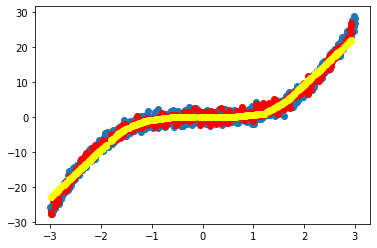

In [31]:
model = NeuralNetwork(size=[1, 30, 30,  1],
                      activation=[ReLU(0.01), ReLU(0.01), Linear(0.5)],
                      loss=Quadratic())

model.SGD(train_X, train_y, val_X, val_y, epochs=300, batch_percent=0.05, eta=1, lmbda=0.5, verbose=False)
modelY = model.feedforward(val_X)

plt.scatter(train_X, train_y)
plt.scatter(val_X, val_y, color="red")
plt.scatter(val_X, modelY, color="yellow")
plt.show()